a. Understanding dataset

In [12]:
# importing pandas csv library:
from Data_Preprocessing import data_import

# stroing csv in variable:
dataframe = data_import("WA_Fn-UseC_-HR-Employee-Attrition.csv")

b. Data Cleaning

In [13]:
# importing pandas csv library:
from Data_Preprocessing import data_cleaning

# data cleaning
dataframe = data_cleaning(dataframe)

c:\Users\xbcnu\OneDrive\Documents\GitHub\Machine_Learning---CSE-472\Offline-2\Data_Preprocessing.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column].fillna(most_frequent, inplace=True)


c. Creation of input and output features

In [14]:
# importing pandas csv library:
from Data_Preprocessing import input_output_feature_creation

# splitting data between Features and Labels
Features ,Labels = input_output_feature_creation(dataframe)

d.  Conversion of features into numeric values

In [15]:
# importing pandas csv library:
from Data_Preprocessing import numeric_conversion

# Conversion of features into numeric values
Features = numeric_conversion(Features)

e. Scaling of the features

In [16]:
# importing pandas csv library:
from Data_Preprocessing import scaling

# Conversion of features into numeric values
features_normalized = scaling(Features,"minmax")

f. Correlation Analysis:

In [17]:
# importing pandas csv library:
from Data_Preprocessing import correlation_analysis

# Conversion of features into numeric values
top_20_correlations,features_df,labels_df = correlation_analysis(features_normalized,Features,Labels)

C:\Users\xbcnu\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\xbcnu\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


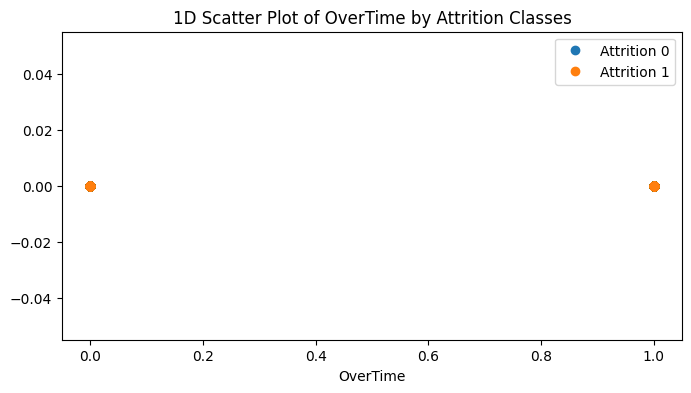

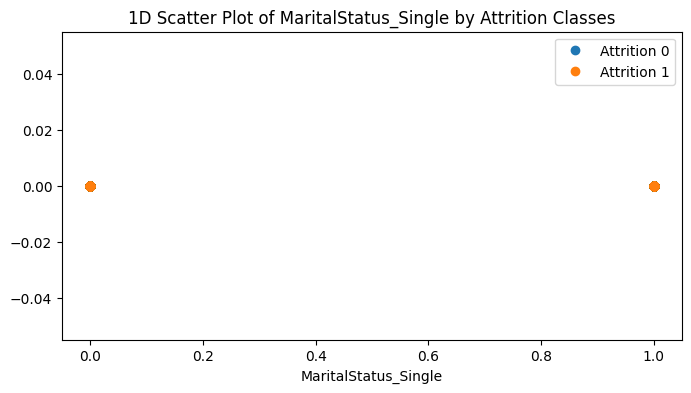

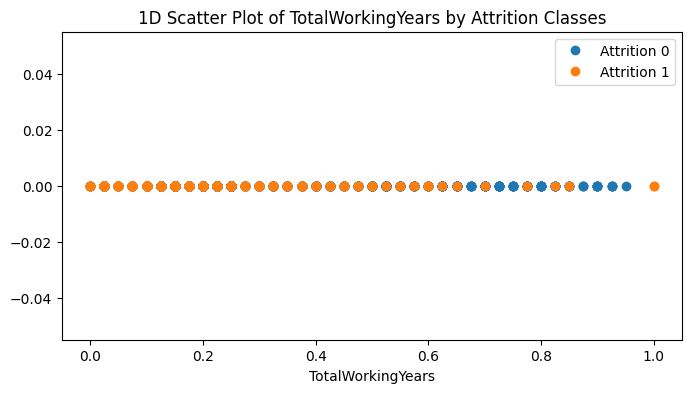

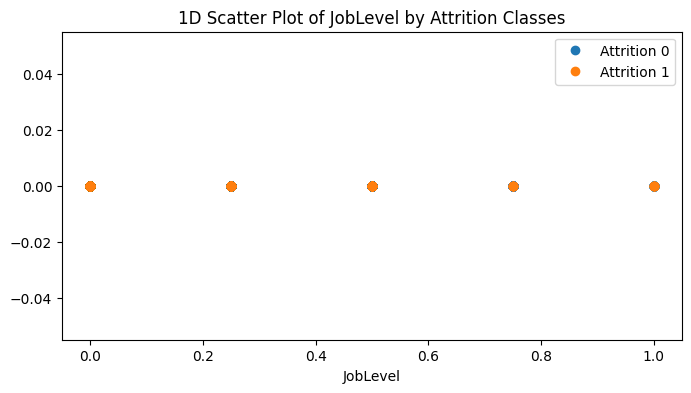

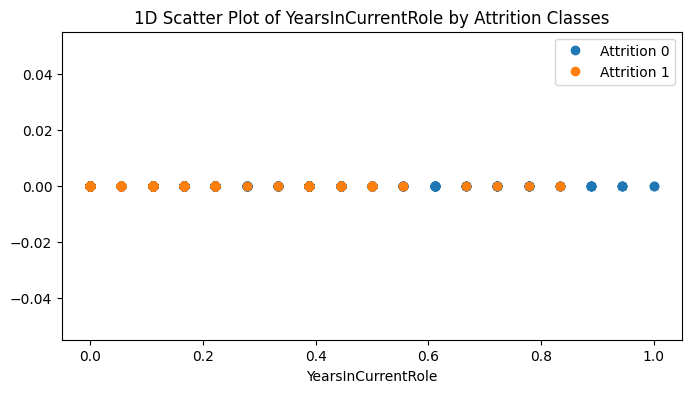

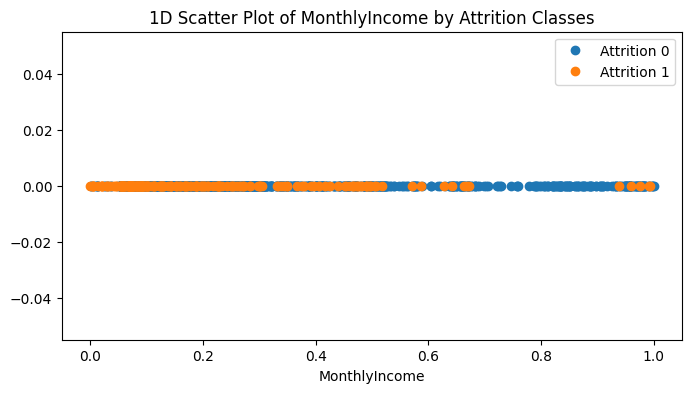

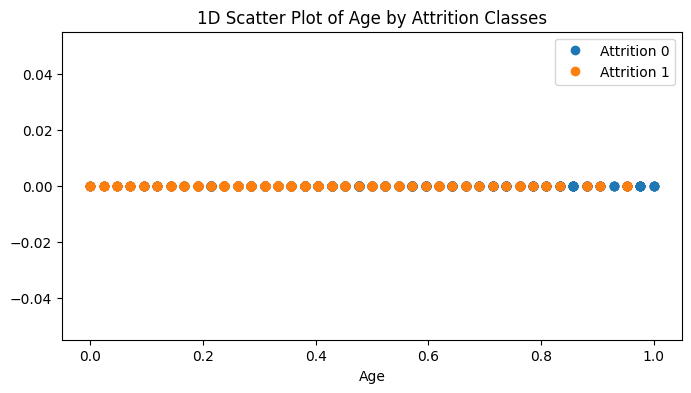

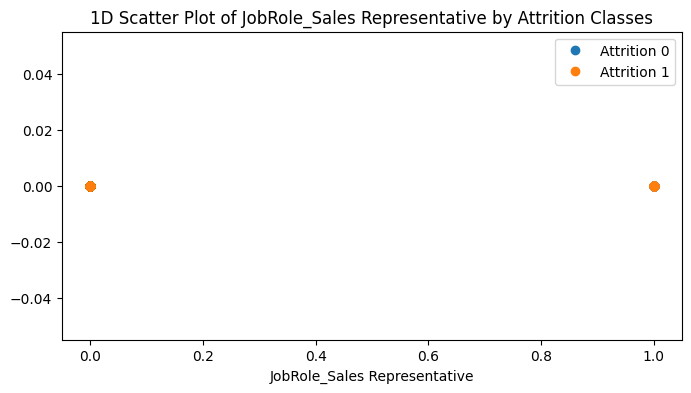

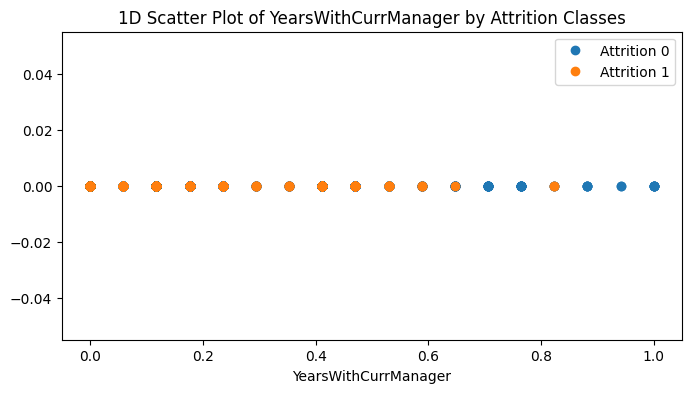

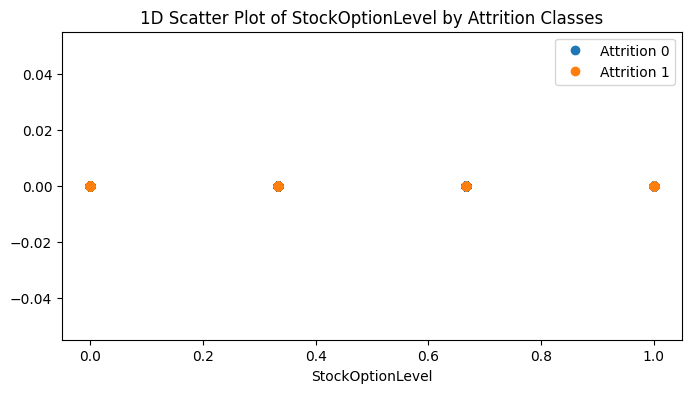

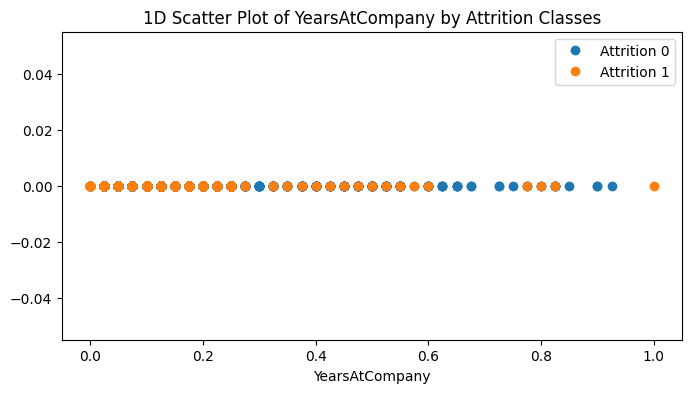

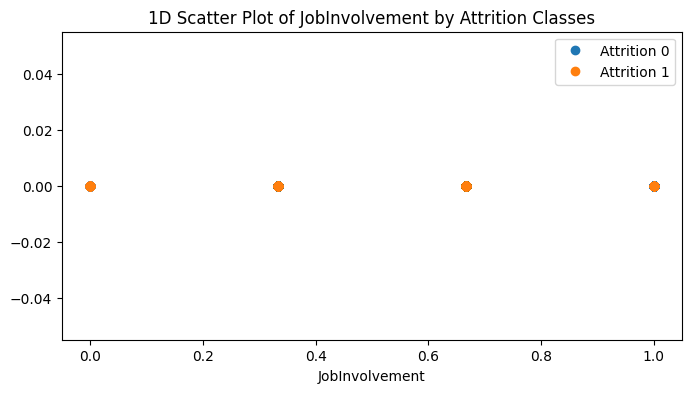

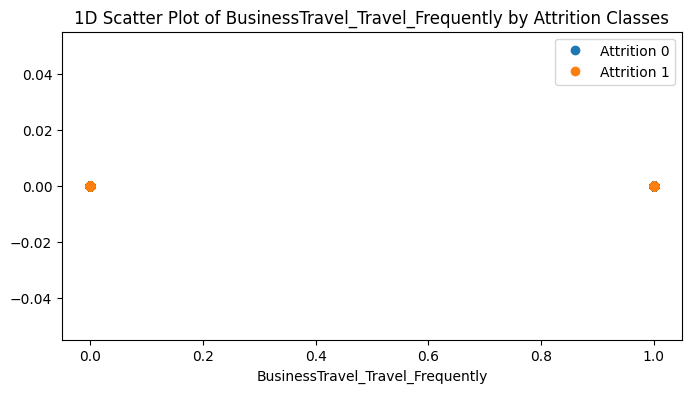

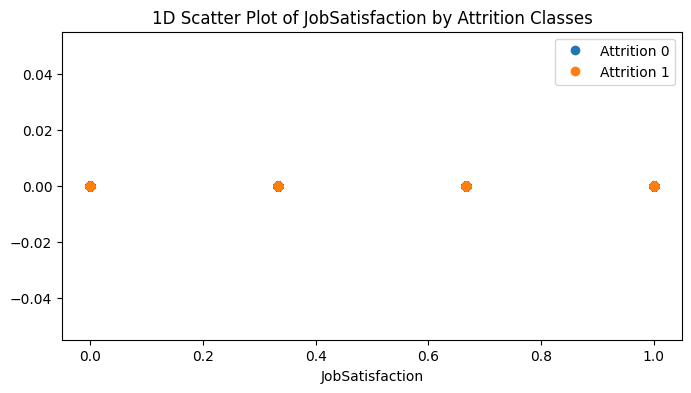

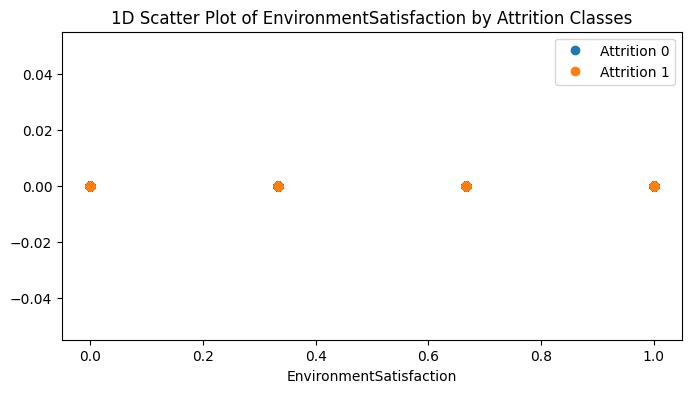

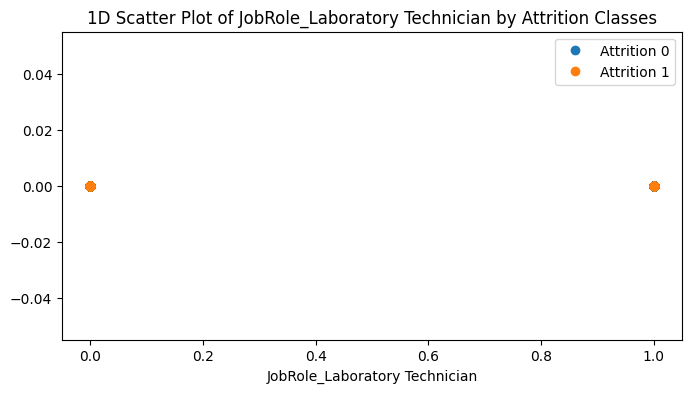

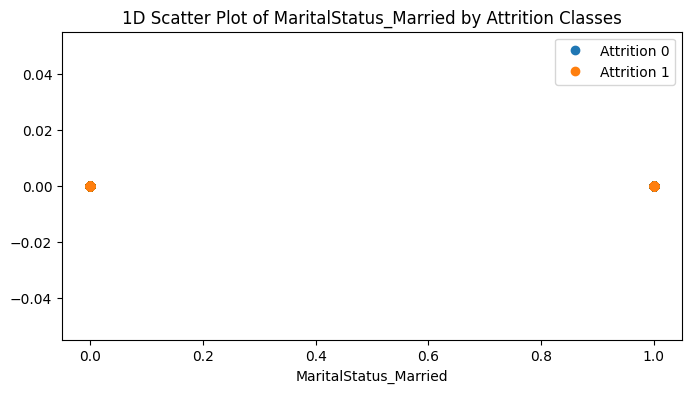

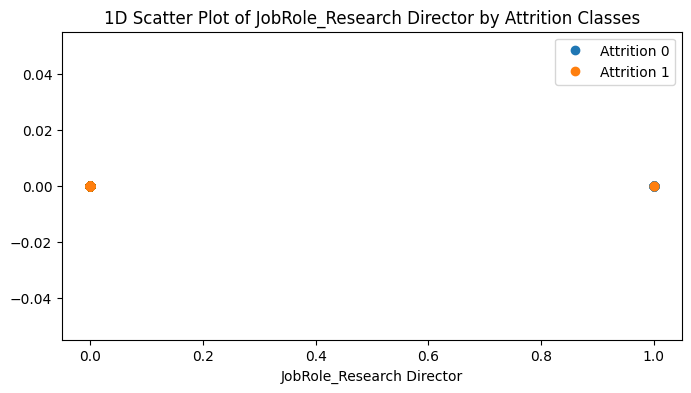

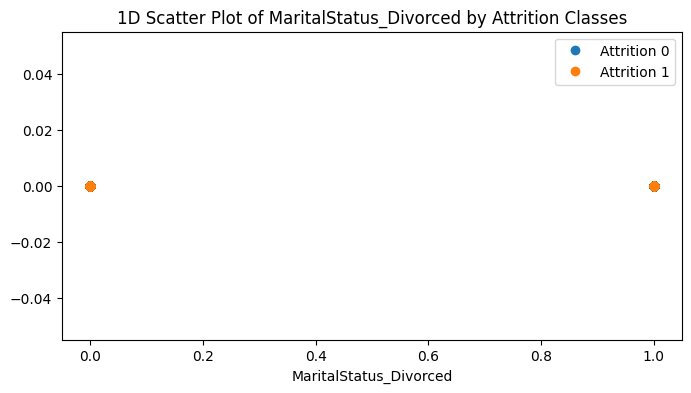

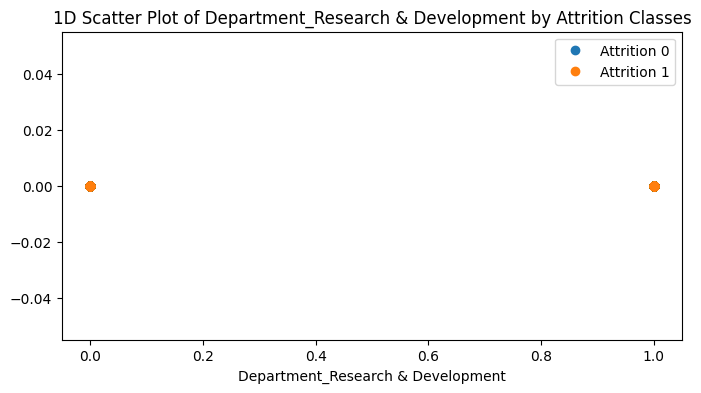

In [18]:
# importing pandas csv library:
from Data_Preprocessing import show_plot

# plotting
show_plot(top_20_correlations,features_df,labels_df)

g. Validating the pipeline:

In [19]:
#Importnecessarylibraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

top_20_features = top_20_correlations.index
selected_features = Features[top_20_features]
features_df = pd.DataFrame(features_normalized[selected_features.columns], columns=selected_features.columns)
#features_df = pd.DataFrame(features_normalized, columns=Features.columns) # scaled feature dataframe

X_train,X_test,y_train,y_test=train_test_split(features_df,labels_df, test_size=0.2,random_state=42)

#Step2: InitializetheLogisticRegressionclassifier
clf=LogisticRegression()
#Step3:Traintheclassifieronthetrainingdata
clf.fit(X_train,y_train)
#Step4:Makepredictionsonthetestset
y_pred=clf.predict(X_test)
#Step5:Evaluatetheclassifier'sperformance
accuracy=accuracy_score(y_test,y_pred)
print(f"AccuracyofLogisticRegressionclassifier:{accuracy:.2f}")

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

AccuracyofLogisticRegressionclassifier:0.88


C:\Users\xbcnu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt


In [21]:
class LR:
    def __init__(self, w_tmp, b_tmp, alpha, iters):
        self.w = w_tmp 
        self.b = b_tmp 
        self.alpha = alpha
        self.iters = iters

    def sigmoid(self,z):
        g = 1/(1+np.exp(-z))
        return g

    def compute_gradient_logistic(self,X, y): 
        m,n = X.shape
        dj_dw = np.zeros((n,))                           #(n,)
        dj_db = 0.

        for i in range(m):
            f_wb_i = self.sigmoid(np.dot(X[i],self.w) + self.b)          #(n,)(n,)=scalar
            err_i  = f_wb_i  - y[i]                       #scalar
            for j in range(n):
                dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
            dj_db = dj_db + err_i
        dj_dw = dj_dw/m                                   #(n,)
        dj_db = dj_db/m                                   #scalar
            
        return dj_db, dj_dw  
    
    def fit(self,X, y): 
        #fit the w and b to X and y using gradient descent
        for i in range(self.iters):
            # Calculate the gradient and update the parameters
            dj_db, dj_dw = self.compute_gradient_logistic(X, y)   

            # Update Parameters using w, b, alpha and gradient
            self.w = self.w - self.alpha * dj_dw               
            self.b = self.b - self.alpha * dj_db               
    
    def predict(self,X):
        results = [] 
        for x in X:
            logistic_model = self.sigmoid(np.dot(x, self.w) + self.b)
            if logistic_model > 0.5:
                results.append(1)
            else:
                results.append(0)
        return np.array(results) 
    
    

In [22]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 3000

lr = LR(w_tmp, b_tmp, alph, iters)

lr.fit(X_train, y_train) 
print(f"\nupdated parameters: w:{lr.w}, b:{lr.b}")

C:\Users\xbcnu\AppData\Local\Temp\ipykernel_21512\3640657517.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar



updated parameters: w:[ 1.91900137  0.70895014 -0.3112034  -0.55222751 -0.90037928 -0.3227615
 -0.45878129  0.67068854 -0.71005087 -0.46781762  0.08089233 -1.13332542
  0.85423004 -1.02950609 -0.89130912  1.06127885 -0.1262641  -0.46590401
 -0.49460908 -0.78730519], b:[0.08807696]


In [23]:
y_pred = lr.predict(X_test)
print(y_pred)

df_y_test = pd.DataFrame(y_test)
df_y_pres = pd.DataFrame(y_pred)

accuracy2=accuracy_score(df_y_test,df_y_pres)
print(f"AccuracyofLogisticRegressionclassifier:{accuracy2:.2f}")



[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
AccuracyofLogisticRegressionclassifier:0.88
